In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("data/weight-height.csv")

In [31]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [32]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [33]:
data = data[["Height", "Weight"]]


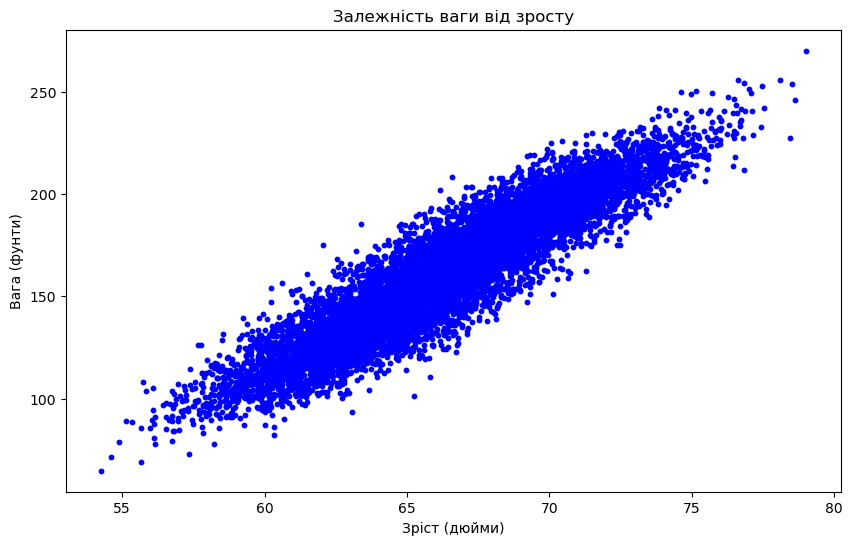

In [34]:
# Графік залежності ваги від зросту
plt.figure(figsize=(10, 6))
plt.scatter(data["Height"], data["Weight"], s=10, color='blue')
plt.title("Залежність ваги від зросту")
plt.xlabel("Зріст (дюйми)")
plt.ylabel("Вага (фунти)")
plt.show()


In [35]:
# Залежна та незалежна змінні
X = data["Height"].values.reshape(-1, 1)  # Зріст (незалежна змінна)
Y = data["Weight"].values.reshape(-1, 1)  # Вага (залежна змінна)

# Розділення на тренувальний і перевірочний набори
X_train, X_cv, y_train, y_cv = train_test_split(X, Y, test_size=0.3, random_state=143)


In [36]:
# Створення та навчання моделі
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Коефіцієнти моделі
print("Коефіцієнт нахилу (b1):", lin_reg.coef_[0][0])
print("Вільний член (b0):", lin_reg.intercept_[0])


Коефіцієнт нахилу (b1): 7.711974656627671
Вільний член (b0): -350.4524489965764


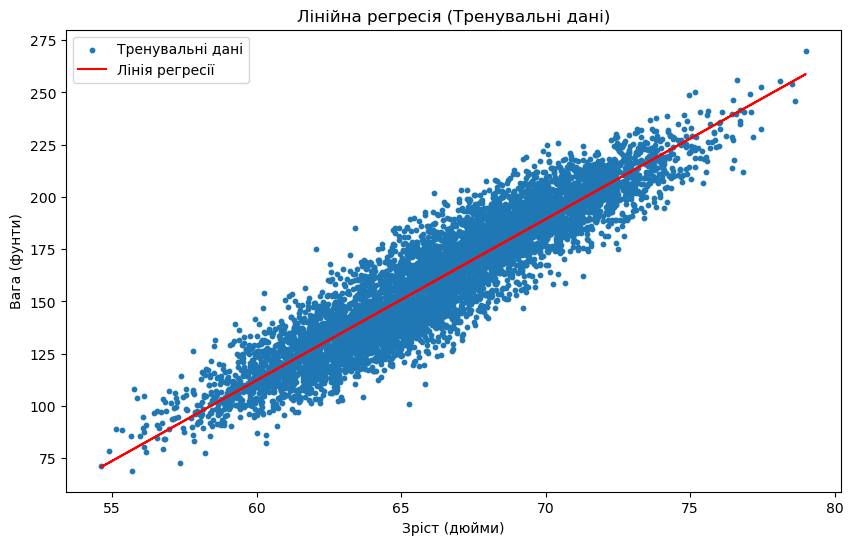

In [37]:
# Прогнозування
train_predictions = lin_reg.predict(X_train)

# Графік тренувальних даних і регресійної лінії
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, s=10, label="Тренувальні дані")
plt.plot(X_train, train_predictions, color='red', label="Лінія регресії")
plt.title("Лінійна регресія (Тренувальні дані)")
plt.xlabel("Зріст (дюйми)")
plt.ylabel("Вага (фунти)")
plt.legend()
plt.show()


In [38]:
# Обчислення метрик для тренувального набору
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)

# Прогнозування для перевірочного набору
cv_predictions = lin_reg.predict(X_cv)
cv_mse = mean_squared_error(y_cv, cv_predictions)
cv_rmse = np.sqrt(cv_mse)

# Оцінка R²
r2 = r2_score(y_cv, cv_predictions)

# Виведення метрик
print("Точність моделі:")
print("MSE (тренувальні дані):", train_mse)
print("RMSE (тренувальні дані):", train_rmse)
print("MSE (перевірочні дані):", cv_mse)
print("RMSE (перевірочні дані):", cv_rmse)
print("R² (перевірочні дані):", r2)


Точність моделі:
MSE (тренувальні дані): 150.05787458252462
RMSE (тренувальні дані): 12.249811205995162
MSE (перевірочні дані): 147.5266516525116
RMSE (перевірочні дані): 12.146054983100957
R² (перевірочні дані): 0.8562572689221781


In [39]:
# Прогнозування для нових значень
new_heights = np.array([60, 65, 70, 75, 80]).reshape(-1, 1)
new_predictions = lin_reg.predict(new_heights)

print("Нові прогнози:")
for height, weight in zip(new_heights.flatten(), new_predictions.flatten()):
    print(f"Зріст: {height} дюймів -> Передбачувана вага: {weight:.2f} фунтів")


Нові прогнози:
Зріст: 60 дюймів -> Передбачувана вага: 112.27 фунтів
Зріст: 65 дюймів -> Передбачувана вага: 150.83 фунтів
Зріст: 70 дюймів -> Передбачувана вага: 189.39 фунтів
Зріст: 75 дюймів -> Передбачувана вага: 227.95 фунтів
Зріст: 80 дюймів -> Передбачувана вага: 266.51 фунтів


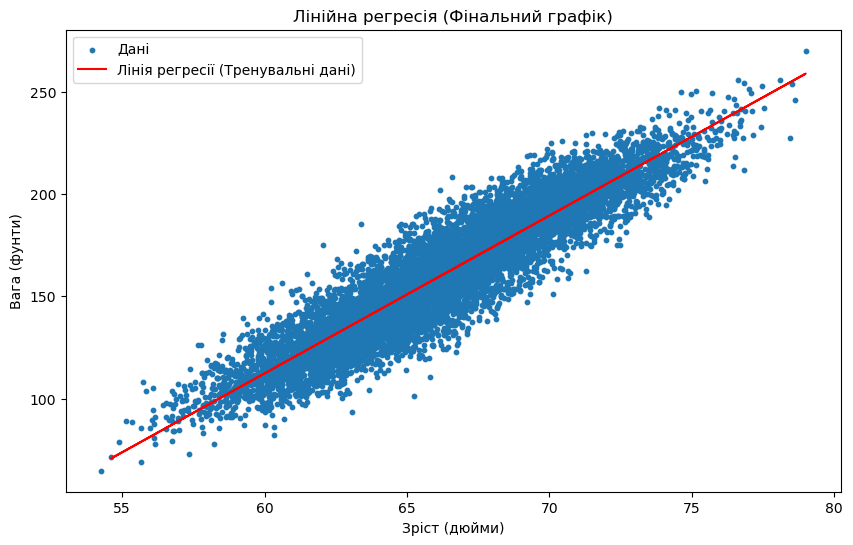

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(data["Height"], data["Weight"], s=10, label="Дані")
plt.plot(X_train, train_predictions, color='red', label="Лінія регресії (Тренувальні дані)")
plt.title("Лінійна регресія (Фінальний графік)")
plt.xlabel("Зріст (дюйми)")
plt.ylabel("Вага (фунти)")
plt.legend()
plt.savefig("linear_reg_final_graph.jpg")
plt.show()
